# Day 4, Fitting

In [161]:
import matplotlib.pyplot as plt,os,time,matplotlib;import numpy as np; import pandas as pd
def sho(img,figsize=(12,6)):
    fig,ax=plt.subplots(figsize=figsize)
    img=plt.imread(img)
    ax.imshow(img)
    ax.axis('off')
%matplotlib inline

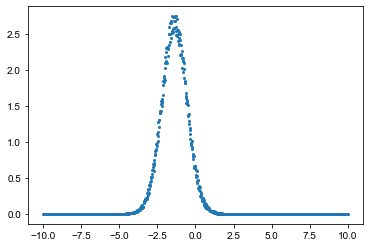

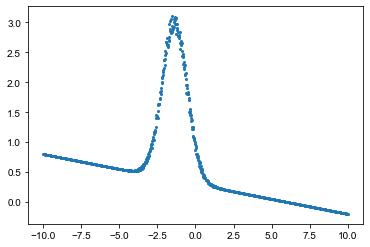

In [162]:
def gauss(x,mu,sigma,offset=0):
    '''returns a vector that contains the normalized 
    and centered gauss function'''
    pre_factor=1/np.sqrt(2*np.pi*(sigma**2))
    exponent=(-0.5/sigma**2)*(np.subtract(x,mu))**2
    return pre_factor*np.exp(exponent)+offset
x=np.linspace(-10,10,1000)

mu=-1.4
sigma=0.8
y=5*gauss(x,mu=mu,sigma=sigma)
y=y+(y**0.5)*2e-1*np.random.random(np.shape(x))
ser=pd.Series(y,index=x)
ser.name='Meas'
ser.index.name='x'
ser.to_csv('fit_0.csv',sep=',',header=True)
fig,ax=plt.subplots()
ax.plot(x,y,'o',ms=2)

mu=-1.4
sigma=0.8
y=5*gauss(x,mu=mu,sigma=sigma)
y=y+(y**0.5)*2e-1*np.random.random(np.shape(x))
y=y+0.3-0.05*x
ser=pd.Series(y,index=x)
ser.name='Meas'
ser.index.name='x'
ser.to_csv('fit_1.csv',sep=',',header=True)
fig,ax=plt.subplots()
ax.plot(x,y,'o',ms=2)

 final_simplex: (array([[0.46509234, 0.46935408, 0.34273092],
       [0.46503701, 0.46936427, 0.34274758],
       [0.46508598, 0.46942723, 0.3427106 ],
       [0.46509513, 0.46944335, 0.34272573]]), array([12.88707711, 12.88710109, 12.88710906, 12.88711732]))
           fun: 12.887077111916193
       message: 'Optimization terminated successfully.'
          nfev: 172
           nit: 94
        status: 0
       success: True
             x: array([0.46509234, 0.46935408, 0.34273092])


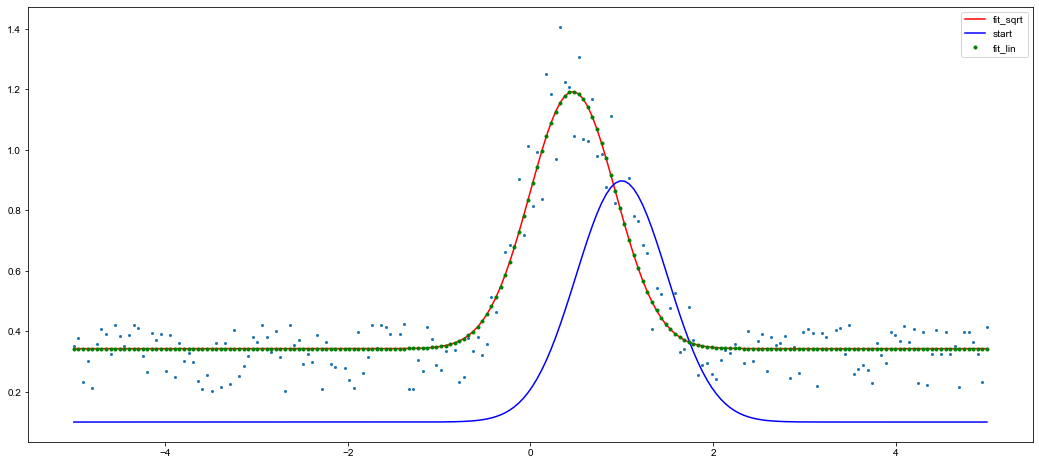

In [163]:
def gauss(x,p):
    [mu,sigma,offset]=p
    pre_factor=1/np.sqrt(2*np.pi*(sigma**2))
    exponent=(-0.5/sigma**2)*(np.subtract(x,mu))**2
    return pre_factor*np.exp(exponent)+offset

x=np.linspace(-5,5,200)
y=gauss(x,[0.5,0.5,0.2])
y=y+(y**0.5)*0.5*np.random.random(np.shape(x))
fig,ax=plt.subplots(figsize=(18,8))
ax.plot(x,y,'o',ms=2)

def min_gauss(p):
    return (np.abs(y-gauss(x,p))).sum()

from scipy.optimize import minimize
x0=[1.,0.5,0.1]
out = minimize(min_gauss,x0=x0,method='Nelder-Mead')

ax.plot(x, gauss(x, p=out['x']), 'r-', label='fit_sqrt')
ax.plot(x, gauss(x, p=x0), 'b-', label='start')

print(out)

def min_gauss_lin(p):
    return np.abs(y-gauss(x,p)).sum()
out2 = minimize(min_gauss_lin,x0=x0,method='Nelder-Mead')

ax.plot(x, gauss(x, p=out2['x']), 'g.', label='fit_lin')
plt.legend()

## Task

use minimize with nelder mead redo the fits from before. 